## Content:



*   Introduction to Broadcasting and Rules of Broadcasting
*   How to calculate pair-wise dot products between rows of M1 and rows of M2 all at once without any loop
*   How to calculate pair-wise difference between entries of vector v1 (n-dim) and entries of vector v2 (m-dim)
*   How to calculate the row-wise squared 2-norms for a matrix M (n x m)
*   Hint for Vectorising K-means distance calculation
*   Hints for K-fold dataset creation and usage

Reference:

[1] https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

[2] https://numpy.org/doc/stable/index.html

[3] https://www.pythonlikeyoumeanit.com/index.html


In [35]:
import numpy as np 


## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [32]:
a = np.array([0, 1, 2])
print("a shape:", a.shape)
print("a + 5:", a + 5)

b = np.array([5, 5, 5])
print("b shape:", b.shape)
print("a + b:", a + b)

a shape: (3,)
a + 5: [5 6 7]
b shape: (3,)
a + b: [5 6 7]


## Broadcasting allows these types of binary operations to be performed on arrays of different sizes
For example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

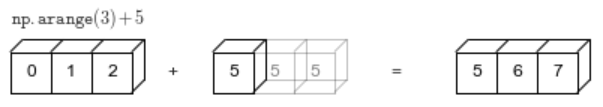

## Extend to higher dimension

In [6]:
M = np.ones((3, 3))
print(M)
print("M shape:",M.shape)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
M shape: (3, 3)


In [7]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

## Add a one-dimensional array to a two-dimensional array

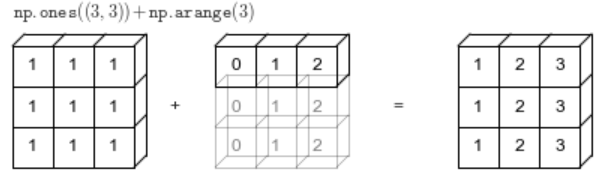


In [16]:
a = np.arange(3)[:, np.newaxis]
print("a shape:", a.shape)
print(a)
b = np.arange(3)
print("b shape:", b.shape)
print(b)


a shape: (3, 1)
[[0]
 [1]
 [2]]
b shape: (3,)
[0 1 2]


In [17]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting of both arrays

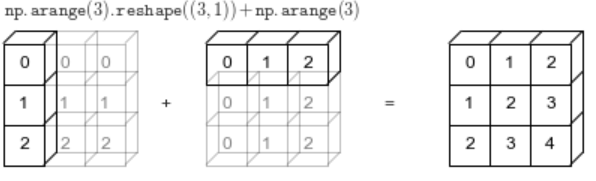

## Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

To determine if two arrays are broadcast-compatible, align the entries of their shapes such that their trailing (i.e. rightmost) dimensions are aligned, and then check that each pair of aligned dimensions satisfy either of the following conditions:

1.   the aligned dimensions have the same size
2.   one of the dimensions has a size of 1

The two arrays are broadcast-compatible if either of these conditions are satisfied for each pair of aligned dimensions.

3. Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.


## Broadcasting example 1
Create 2 arrays that have shape of (2,3) and (3,)

In [12]:
M = np.ones((2, 3))
print("M shape:", M.shape)
print(M)
A = np.arange(3)
print("A shape:", A.shape)
print(A)

M shape: (2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]
A shape: (3,)
[0 1 2]


The shape of the 2 arrays are:

*   M shape = 2 * 3
*   A shape  = $\;\;\;\;$  3
********************************************************************************
It follows Rule1 as aligned dimensions are same and therefore broadcast compatible.From Rule 3

*   Result shape = 2 * 3


********************************************************************************
The shapes match, and we see that the final shape will be (2, 3):
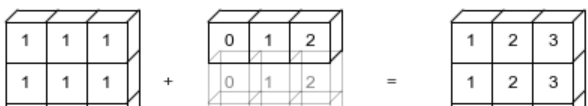

In [16]:
M + A

array([[1., 2., 3.],
       [1., 2., 3.]])

## Broadcasting example 2
Both arrays need to be broadcast:

In [36]:
a = np.arange(3).reshape((3, 1)) 
b = np.arange(3).reshape((1,3))
print(a)
print(b)

[[0]
 [1]
 [2]]
[[0 1 2]]


The shape of the 2 arrays are:

*   a.shape = 3 * 1
*   b.shape = $\;\;\;$ 3
********************************************************************************
It follows Rule2  and therefore  is broadcast compatible.From Rule 3
*   Result shape = 3 * 3

********************************************************************************
The shapes match, and we see that the final shape will be (3, 3):
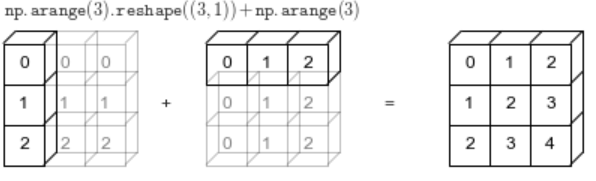

In [37]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3
Two arrays are not compatible

In [19]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


The shape of the 2 arrays are:

*   M.shape = 3 * 2
*   a.shape = $\;\;\;\;$ 3
********************************************************************************
It doesn't satisfy both Rule1 and Rule2 and therefore throws value error.



In [20]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

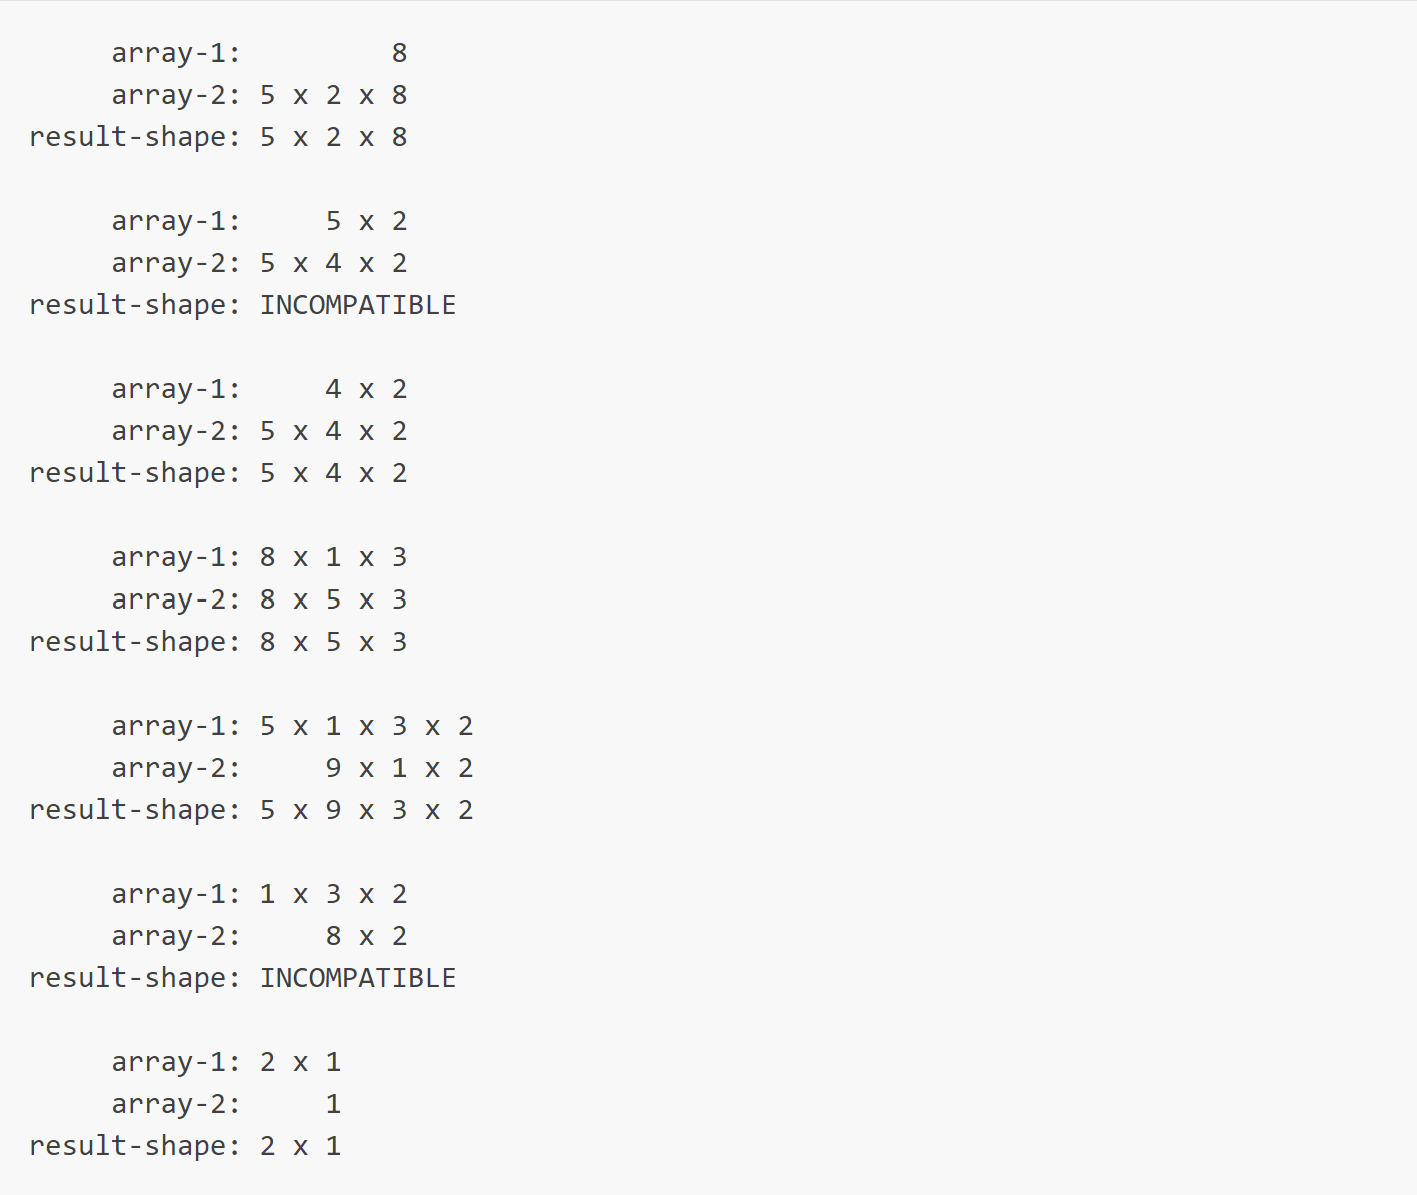

## Problem 1: how to calculate pair-wise dot products between rows of M1 and rows of M2 all at once without any loop

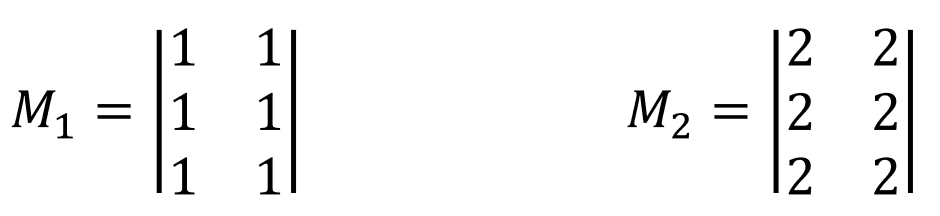

In [21]:
M1 = np.ones((3, 2))
M2 = np.full((3, 2), 2, dtype=int)


In [22]:
M1 @ (M2.T)

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

## Problem 2: how to calculate pair-wise difference between entries of vector v1 (n-dim) and entries of vector v2 (m-dim)?

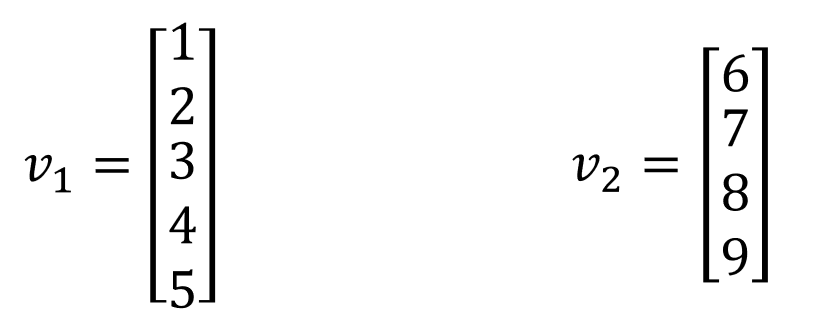

In [26]:
v1 = np.arange(1, 6)
v2 = np.arange(6, 10)

print(v1)
print(v2)

[1 2 3 4 5]
[6 7 8 9]


In [28]:
v_diff_mat = v1.reshape(-1, 1) - v2.reshape(1, -1) #(n x m)
print(v1.reshape(-1, 1).shape)
print(v2.reshape(1, -1).shape)
print(v_diff_mat)

(5, 1)
(1, 4)
[[-5 -6 -7 -8]
 [-4 -5 -6 -7]
 [-3 -4 -5 -6]
 [-2 -3 -4 -5]
 [-1 -2 -3 -4]]


## Problem 3: how to calculate the row-wise squared 2-norms for a matrix M (n x m)


In [25]:
x = np.array([[ 8,  1,  8],
              [ 3,  8,  5],
              [ 7,  6,  1],
              [ 6,  9,  8],
              [ 7,  8,  5]])
print(x.shape)

(5, 3)


In [26]:
x_new = (x ** 2).sum(axis=1) # (n,)
print(x_new)
print(x_new.shape)

[129  98  86 181 138]
(5,)


## Hint for the KNN vectorization
Suppose we have two, 2D arrays. X has a shape of (M, D) and Y has a shape of (N, D). We want to compute the L2-distance between each pair of rows between the two arrays. 

One given row in X is represented by (x1, x2, ...., xd) and one given row in Y is represented by (y1, y2, ...., yd). The L2-distance between two rows are:

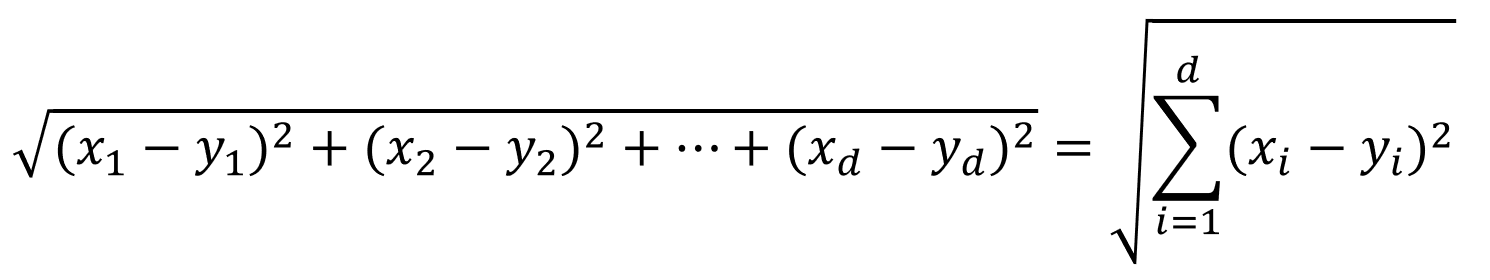

If we only consider the term inside the square root, we can write it in a different way:

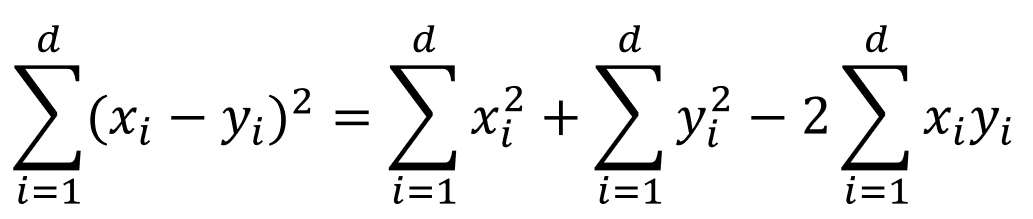

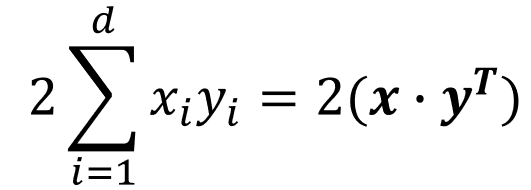

In [30]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([[2,4,6],
              [1,3,5]])
print(A)
print(A.shape)
print(B)
print(B.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
[[2 4 6]
 [1 3 5]]
(2, 3)


# Hints for K-fold dataset creation and usage



### Steps for k-fold validation

1. Shuffle the Training data( Be sure to shuffle labels also accordingly) 
2. Create folds : 
   a) Fold size calculation
   b) Generate chunk of indices
3.  Error_list=[]
    
    For each hyperparameter:
        For Each fold "i":
            a) Use fold "i" for validation
            b) Combine other folds to get training data
            c) Calculate validation error 
    Append averaged validation error to Error_list
    
        

### 1. Shuffling

  np.random.permutation(x):

  Randomly permute a sequence, or return a permuted range.

In [28]:
np.random.permutation(10) #### Can be used to generate random indices

array([8, 2, 6, 4, 7, 5, 0, 1, 3, 9])



### 2.  training and validation set creation based on the folds
    
    numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")

  Join a sequence of arrays along an existing axis.